<a href="https://colab.research.google.com/github/DotBion/improved-octo-sniffle/blob/main/run_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from os.path import dirname, join as pjoin
import scipy.io as sio

In [ ]:
# data_dir = pjoin(dirname(sio.__file__), 'matlab', 'tests', 'data')
mat_fname = "/content/data_n100000_nf3_b1000b2000b3000_edge125_noiseless.mat"#pjoin(data_dir, 'testdouble_7.4_GLNX86.mat')

In [ ]:
mat_contents = sio.loadmat(mat_fname, spmatrix=False)

In [ ]:
!pip install h5py

import h5py
import os

mat_fname = "/content/data_n100000_nf2_b1000b2000b3000_edge125_noiseless.mat"

# Check if the file exists
if not os.path.exists(mat_fname):
    print(f"Error: File not found at {mat_fname}")
else:
    try:
        # Attempt to read using h5py (for MATLAB v7.3 files)
        with h5py.File(mat_fname, 'r') as f:
            print("Successfully opened with h5py. File might be a valid MATLAB v7.3 file.")
            # You can inspect the contents, e.g., print keys
            print("Keys in the file:", list(f.keys()))
        # If h5py succeeds, try scipy.io.loadmat again
        # mat_contents = sio.loadmat(mat_fname, spmatrix=False)
        # print("Successfully loaded with scipy.io.loadmat after h5py check.")

    except Exception as e:
        print(f"Could not open with h5py. Error: {e}")
        print("This could mean the file is corrupted, not a MATLAB v7.3 file, or in an older format.")
        print("If it's an older format, the issue is likely corruption.")

Could not open with h5py. Error: Unable to synchronously open file (file signature not found)
This could mean the file is corrupted, not a MATLAB v7.3 file, or in an older format.
If it's an older format, the issue is likely corruption.


In [ ]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed May 21 11:26:03 2025',
 '__version__': '1.0',
 '__globals__': [],
 'F': array([[ 2.52212399,  0.25257685, -0.17632473, ..., -0.93974505,
          0.73219754, -0.21731491],
        [ 2.52212399,  0.31377339, -0.20708152, ..., -0.93195276,
          1.1898421 ,  0.08906574],
        [ 2.52212399,  0.19456473, -0.22254519, ..., -0.884662  ,
          0.73310509,  0.59302917],
        ...,
        [ 2.52212399,  0.35849052, -0.10983818, ..., -0.21505475,
         -0.91686062, -0.35860122],
        [ 2.52212399, -0.27035617,  0.35090651, ...,  1.16969234,
          0.23712446,  0.42442283],
        [ 2.52212399,  0.02424407, -0.09760866, ..., -0.43072812,
          1.22682487,  0.24455586]]),
 'b_table': array([[ 0.00000000e+00,  1.00602779e+03,  1.00602779e+03, ...,
          3.01808337e+03,  3.01808337e+03,  3.01808337e+03],
        [ 0.00000000e+00, -8.91291143e-01, -3.78301055e-01, ...,
         -4.29105854e-01,  

The array "b_table" holds the diffusion sampling scheme. The first row contains b-values. In this data set, the b-values are: 0, 1000, 2000, 3000. So, we have a 3-shell acquisition here (we don't count b=0 as a shell, because it is a variant without diffusion encoding, which is only used for weighting the signal). The remaining rows contain the x,y,z coordinates of the b-vectors (i.e. diffusion encoding directions). In total, there are 271 b-vectors (including b=0).

In [ ]:
mat_contents['b_table'].shape

(4, 271)

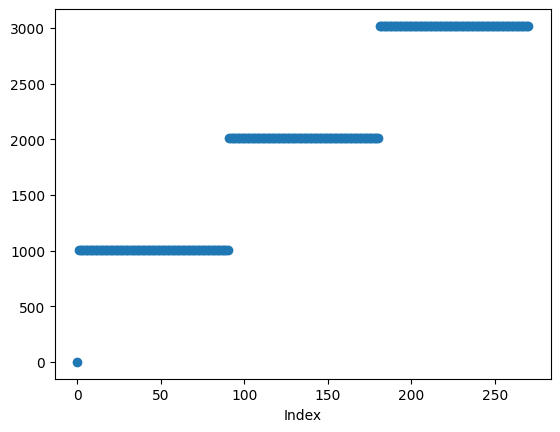

In [ ]:
b_table = mat_contents['b_table']

b_values = b_table[0, :]

plt.plot(b_values, 'o')
plt.xlabel('Index')
plt.show()

In [ ]:
mat_contents['b_table'][0].size

271

In [ ]:
mat_contents['b_table'][1].size

271

In [ ]:
mat_contents['odf_vertices'].shape #cartesian co-ord system

(3, 642)

In [ ]:
mat_contents['b_table'][3].shape

(271,)

In [ ]:
mat_contents['b_table'][0]

array([   0.        , 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778

In [ ]:
mat_contents['b_table'][0][1]

np.float64(1006.0277893195466)

In [ ]:
mat_contents['b_table'][0][0]

np.float64(0.0)

The array "dwi" holds the synthetically generated diffusion-weighted signal. There are 100000 voxels, each sampled at 271 directions (defined above).

In [ ]:
mat_contents['dwi']

array([[1.        , 0.31195417, 0.4231861 , ..., 0.25608753, 0.16073867,
        0.16501516],
       [1.        , 0.31222386, 0.47758949, ..., 0.09984222, 0.00542485,
        0.25714448],
       [1.        , 0.31726607, 0.49845288, ..., 0.24685151, 0.09830928,
        0.2075306 ],
       ...,
       [1.        , 0.42654667, 0.19611733, ..., 0.02835854, 0.40496194,
        0.50855868],
       [1.        , 0.55160488, 0.32050978, ..., 0.11402807, 0.29887914,
        0.14130635],
       [1.        , 0.56221625, 0.17264937, ..., 0.00855773, 0.26726788,
        0.4473527 ]])

In [ ]:
mat_contents['dwi'].shape

(100000, 271)

In [ ]:
mat_contents['dwi'][0].shape

(271,)

The array "odf" holds the respective orientation distribution functions of the 100000 voxels. Mathematically, ODFs are defined on a sphere, but here we consider their discretized version. For this, we represent ODFs using a triangular parcellation of a sphere. There are 642 vertices spread uniformly on the unit sphere. You'll find their coordinates in the "odf_vertices" array. Each triangle of a parcellation is composed of odf_vertices whose indices are stored in "odf_faces". As Steven mentioned yesterday, ODFs are symmetrical, so we only store a half of the information – that's why "odf" has 642/2=321 columns.

In [ ]:
mat_contents['odf'].shape

(100000, 321)

The last element that's important for now is the ground truth. You'll find it in the "voxt" array.

There's a lot of information there, but for now only two columns will matter:
ndir – number of directions in a given voxel (I gave you .mat files with 1 or 2 fibers and .mat files with 1, 2, or 3 fibers).
directions – spherical coordinates of the fiber directions;

In [ ]:
mat_contents['voxt'].shape

(1, 100000)

In [ ]:
mat_contents['voxt']['ndir']

array([[array([[2]], dtype=uint8), array([[1]], dtype=uint8),
        array([[2]], dtype=uint8), ..., array([[1]], dtype=uint8),
        array([[2]], dtype=uint8), array([[1]], dtype=uint8)]],
      dtype=object)

In [ ]:
mat_contents['voxt']['ndir'].shape

(1, 100000)

In [ ]:
mat_contents['voxt']['directions']

array([[array([[-2.55447576, -0.16124779],
               [ 2.21817964,  0.6006047 ]]),
        array([[-1.9613111 , -0.02115459]]),
        array([[ 0.73833009, -0.33914801],
               [ 2.2265041 , -0.46970861]]), ...,
        array([[2.7370469 , 1.05046442]]),
        array([[ 1.73453763,  0.04463238],
               [-2.621079  , -1.16466391]]),
        array([[-1.55462809, -0.96167522]])]], dtype=object)

In [ ]:
mat_contents['voxt']['directions'].shape

(1, 100000)

In [ ]:
mat_contents['voxt']

array([[(array([[2]], dtype=uint8), array([[-2.55447576, -0.16124779],
               [ 2.21817964,  0.6006047 ]]), array([[0.        ],
               [0.67774648],
               [0.32043846]]), array([[2.45372372],
               [1.18311642],
               [1.11242085]]), array([[ 0.11425483,  2.45372372,  2.45372372,  2.45372372,  1.57079633,
                 1.57079633,  0.        ],
               [ 0.38011042,  0.62730766,  0.62730766,  2.29473395, -2.55447576,
                -0.16124779,  0.        ],
               [ 0.50563474,  0.89918955,  0.89918955,  1.53888344,  2.21817964,
                 0.6006047 ,  0.        ]]), array([], shape=(0, 0), dtype=uint8), array([[0],
               [0],
               [0]], dtype=uint8), array(['twocomp'], dtype='<U7'), array([[0.        , 2.45372372, 2.45372372, 0.        ],
               [2.38842423, 2.29473395, 0.62730766, 0.70490941],
               [2.26017977, 1.53888344, 0.89918955, 0.30158535]]))                              